# Reading MonaLIA RDF Data
To run the local SPARQL over HTTP I've installed Apache Jena Fuseki service; started the service with 20Gb memmory option; uploaded the Joconde files:

    Joconde_2018-03-21.ttl
    reprskos.rdf
    domnskos.rdf
    skos.rdf
    monalia_skos.rdf
    
Dataset can be manages from http://localhost:3030   

https://stackoverflow.com/questions/13897712/where-do-i-test-my-queries-for-my-rdf-written-in-sparql
http://jena.apache.org/documentation/serving_data/index.html#download-fuseki1

For RDF data to pandas dataframe conversion all credit to Ted Lawless
https://lawlesst.github.io/notebook/sparql-dataframe.html

In [1]:
import os
import sys
import numpy as np
import pandas as pd

import json
from SPARQLWrapper import SPARQLWrapper, JSON, N3, XML

import matplotlib.pyplot as plt

In [2]:
# Import MonaLIA library from the package in the subfolder of the notebook folder
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from MonaLIA.util import metadata_helpers as metadata
from MonaLIA.data import stratified_split as imagedata


### Read the query string from the file

The file can be developed in CORESE

In [3]:
query_path = os.path.abspath(os.path.join('../..' , 'Queries', 'MonaLIA.DL Dataset.General.Subset.rq'))
f = open(query_path, mode='rt', encoding='utf-8') 
qs_templ = f.read()
f.close()
print(qs_templ)

#MonaLIA.DL Dataset Query General.rq
# replace first string placeholder with a list of categories so the query line reads like
#    VALUES (?topCategory_label)  { ("être humain"@fr)    ("chien"@fr)  ("élément d'architecture"@fr) } .
#
# replace second string placeholder with a list of excluded categories so the query line reads like
#			VALUES (?exceptionCategory_label)  { ("le corps humain"@fr)   } .
# or for empty exclusion list
#           VALUES (?exceptionCategory_label)  {  (""@fr)   } .
# replace number placeholder with the number of joint classes per image desired + 1
#    for ex.: 2 - disjoint classes, 3 - only images with two classes labels present and so on


prefix skos: <http://www.w3.org/2004/02/skos/core#> 
prefix jcl: <http://jocondelab.iri-research.org/ns/jocondelab/>


select (group_concat(?topCategory_label; separator="+" ) as ?label)
          (sample(?noticeRepresentation) as ?repr)
          (sample(?imagePath) as ?image_path)
          (sample(?noticeReference) a

In [4]:
include_terms_list = ['"arbre"@fr',
                        '"en buste"@fr',
                        '"fleur"@fr',
                        '"nu"@fr',
                        '"cheval"@fr',
                        '"maison"@fr',
                        '"oiseau"@fr',
                        '"bateau"@fr',
                        '"église"@fr',
                        '"de profil"@fr',
                      
                        '"à mi-corps"@fr',
                        '"chien"@fr',
                        '"de face"@fr',
                        '"ange"@fr',
                        '"couronne"@fr',
                        '"livre"@fr',
                        '"chapeau"@fr',
                        '"draperie"@fr',
                        '"château"@fr',
                        '"montagne"@fr', 
                      
                        '"croix"@fr',
                        '"cavalier"@fr',
                        '"épée"@fr',
                        '"voiture à attelage"@fr',
                        '"pont"@fr',
                        '"main"@fr',
                        '"mer"@fr',
                        '"nudité"@fr',
                        '"feuille"@fr',
                        '"bateau à voiles"@fr',
                      
                        '"armure"@fr',
                        '"uniforme"@fr',
                        '"casque"@fr',
                        '"table"@fr',
                        '"tour"@fr',
                        '"lion"@fr',
                        '"drapeau"@fr',
                        '"mouton"@fr',
                        '"nuage"@fr',
                        '"robe"@fr',

                        '"bâton"@fr',
                        '"port"@fr',
                        '"parc"@fr',
                        '"manteau"@fr',
                        '"vache"@fr',
                        '"escalier"@fr',
                        '"fusil"@fr',
                        '"lit"@fr',
                        '"pêche"@fr',
                        '"cerf"@fr',
                      
                        '"cimetière"@fr',
                        '"bouclier"@fr',
                        '"sanglier"@fr',
                        '"porte"@fr',
                        '"fenêtre"@fr',
                        '"arcade"@fr',
                        '"chaise"@fr',
                        '"pot"@fr',
                        '"flèche"@fr',
                        '"poisson"@fr',
                      
                        '"Christ en croix"@fr',
                        '"chaussure"@fr',
                        '"trône"@fr',
                        '"bonnet"@fr',
                        '"papillon"@fr',
                        '"chat"@fr',
                        '"arc"@fr',
                        '"lyre"@fr',
                        '"tonneau"@fr',
                        '"tente"@fr',
                      
                        '"singe"@fr',
                        '"sac"@fr',
                        '"bouteille"@fr',
                        '"plage"@fr',
                        '"neige"@fr',
                        '"flûte"@fr',
                        '"éventail"@fr',
                        '"échelle"@fr',
                        '"moulin à vent"@fr',
                        '"rideau"@fr',

                        '"arènes"@fr',
                        '"éléphant"@fr',
                        '"pipe"@fr',
                        '"lettre"@fr',
                        '"phare"@fr',
                        '"roue"@fr',
                        '"horloge"@fr',
                        '"couteau"@fr',
                        '"guitare"@fr',
                        '"train"@fr',
                      
                        '"harpe"@fr',
                        '"automobile"@fr',
                        '"arc monumental"@fr',
                        '"assiette"@fr',
                        '"ours"@fr',
                        '"seau"@fr',
                        '"bicyclette"@fr',
                        '"pyramide"@fr',
                        '"grenouille"@fr',
                        '"avion"@fr',

                      '"piano"@fr',
                      '"aérostat"@fr']


                        #'"être humain"@fr' ]


exclude_terms_list = [] #['"le corps humain"@fr']

#include_terms_list = [ '"être humain"@fr', '"espèce animale"@fr' ] 

include_terms = ' '.join(['(%s)' % x for x in include_terms_list[:40] ])
exclude_terms = ' '.join(['(%s)' % x for x in exclude_terms_list])

include_terms

'("arbre"@fr) ("en buste"@fr) ("fleur"@fr) ("nu"@fr) ("cheval"@fr) ("maison"@fr) ("oiseau"@fr) ("bateau"@fr) ("église"@fr) ("de profil"@fr) ("à mi-corps"@fr) ("chien"@fr) ("de face"@fr) ("ange"@fr) ("couronne"@fr) ("livre"@fr) ("chapeau"@fr) ("draperie"@fr) ("château"@fr) ("montagne"@fr) ("croix"@fr) ("cavalier"@fr) ("épée"@fr) ("voiture à attelage"@fr) ("pont"@fr) ("main"@fr) ("mer"@fr) ("nudité"@fr) ("feuille"@fr) ("bateau à voiles"@fr) ("armure"@fr) ("uniforme"@fr) ("casque"@fr) ("table"@fr) ("tour"@fr) ("lion"@fr) ("drapeau"@fr) ("mouton"@fr) ("nuage"@fr) ("robe"@fr)'

In [5]:
#qs = qs_templ % (include_terms, exclude_terms , 10)
qs = qs_templ % ('("genre de la représentation"@fr)', '', 10)
print(qs)

#MonaLIA.DL Dataset Query General.rq
# replace first string placeholder with a list of categories so the query line reads like
#    VALUES (?topCategory_label)  { ("être humain"@fr)    ("chien"@fr)  ("élément d'architecture"@fr) } .
#
# replace second string placeholder with a list of excluded categories so the query line reads like
#			VALUES (?exceptionCategory_label)  { ("le corps humain"@fr)   } .
# or for empty exclusion list
#           VALUES (?exceptionCategory_label)  {  (""@fr)   } .
# replace number placeholder with the number of joint classes per image desired + 1
#    for ex.: 2 - disjoint classes, 3 - only images with two classes labels present and so on


prefix skos: <http://www.w3.org/2004/02/skos/core#> 
prefix jcl: <http://jocondelab.iri-research.org/ns/jocondelab/>


select (group_concat(?topCategory_label; separator="+" ) as ?label)
          (sample(?noticeRepresentation) as ?repr)
          (sample(?imagePath) as ?image_path)
          (sample(?noticeReference) a

### Specify local service

In [6]:
wds = "http://localhost:3030/Joconde/query"
#wds = "http://localhost:8080/sparql"

### Run  query

In [29]:
image_set_df = metadata.sparql_service_to_dataframe(wds, qs)
image_set_df.head()

,label,repr,image_path,ref,term_count_count,top_term_count,terms,domain,theme_label
0,genre de la représentation,"paysage (canal, village, passerelle, barque, p...",/0093/m503501_d0109897-000_p.jpg,50350109897,1,1,paysage,dessin,paysage
1,genre de la représentation,"portrait (Henri III, roi de Pologne, roi de Fr...",/0662/m501702_0006031_p.jpg,50170000659,1,1,portrait,estampe ; histoire,portrait
2,genre de la représentation,"scène historique (Compiègne, camp militaire, t...",/0681/m505201_0005967_p.jpg,50520006604,1,1,scène historique,dessin,scène historique
3,genre de la représentation,"paysage (Italie, Naples, bord de mer, barque)",/0607/m074801_0013901_p.jpg,07480012258,1,1,paysage,dessin,paysage
4,genre de la représentation,scène biblique (Présentation de la Vierge au T...,/0532/m501104_94-056183_p.jpg,50110000448,1,1,scène biblique,peinture,scène biblique


In [30]:
image_set_df.shape

(157239, 9)

#### Give the short column names

In [31]:
col_names = ['label', 'repr', 'imagePath', 'ref',  'term_count', 'top_term_count',  'terms', 'domain', 'theme_label']

image_set_df.columns = col_names
print('Shape:' ,  image_set_df.shape)

#image_set_df.fillna('', inplace=True)
print(image_set_df.groupby(['theme_label']).size().sort_values())

Shape: (157239, 9)
theme_label
groupes de figures                   7
suite de figures                    24
fond de paysage                     37
scènes                              64
représentation humaine             235
figures mythologiques              255
suite de scènes                    324
figures                            327
autoportrait                       576
représentation non figurative      632
portrait collectif                 740
figures bibliques                  821
portrait charge                    831
vue d'intérieur                    910
nature morte                      1209
figure mythologique               1727
groupe de figures                 1858
représentation scientifique       2299
portrait d'inconnu                2501
représentation végétale           2845
figure biblique                   2927
scène mythologique                3256
représentation d'objet            4252
scène historique                  4461
scène biblique                   

## Add image size columns (if not queried before)

quickest way but the size can be queried in the initial query

In [32]:
if('width' not in image_set_df.columns):
    csv_file_name = 'C:/Users/abobashe/Documents/MonaLIA/Joconde/Ext/main_image_size.csv'
    image_size_df = pd.read_csv(csv_file_name)
    image_root = 'C:\\Joconde\\joconde'

    try:
        image_size_df
    except NameError:
        image_set_df['width'] = 0
        image_set_df['height'] = 0

    else:
        image_set_df = pd.merge(image_set_df,
                                image_size_df[['ref', 'width', 'height']],
                                on='ref',
                                how='left')
        image_set_df.fillna(0 , inplace=True)


    error_count = 0
    new_count = 0

    for i, row in image_set_df[image_set_df.width == 0].iterrows():

        if os.path.isfile(image_root + row.imagePath) :
            try:

                image = Image.open(image_root + row.imagePath)

                # get image size
                #images_df.loc[i, ['exists']] = True
                image_set_df.loc[i, ['width']] = image.size[0]
                image_set_df.loc[i, ['height']] = image.size[1]

                image.close()
                new_count += 1
            except:
                error_count += 1
        if i % 1000 == 0:
            print (i, end=', ')

    print()            
    print('updated size %d; detected %d errors' %  (new_count, error_count))
image_set_df.head()                    

3000, 37000, 41000, 63000, 66000, 88000, 109000, 114000, 155000, 
updated size 0; detected 0 errors


,label,repr,imagePath,ref,term_count,top_term_count,terms,domain,theme_label,width,height
0,genre de la représentation,"paysage (canal, village, passerelle, barque, p...",/0093/m503501_d0109897-000_p.jpg,50350109897,1,1,paysage,dessin,paysage,768,512
1,genre de la représentation,"portrait (Henri III, roi de Pologne, roi de Fr...",/0662/m501702_0006031_p.jpg,50170000659,1,1,portrait,estampe ; histoire,portrait,432,600
2,genre de la représentation,"scène historique (Compiègne, camp militaire, t...",/0681/m505201_0005967_p.jpg,50520006604,1,1,scène historique,dessin,scène historique,800,563
3,genre de la représentation,"paysage (Italie, Naples, bord de mer, barque)",/0607/m074801_0013901_p.jpg,07480012258,1,1,paysage,dessin,paysage,800,521
4,genre de la représentation,scène biblique (Présentation de la Vierge au T...,/0532/m501104_94-056183_p.jpg,50110000448,1,1,scène biblique,peinture,scène biblique,486,600


In [33]:
dataset_root = 'C:/Datasets/Joconde'
top_category =  'Themes' 
class_root = os.path.join(dataset_root, top_category)
group_by = 'theme_label'


## Filter Data
filter out the records that have invalid image path

filter out the images that are too tall or too long

In [34]:
aspect_ratio_thershold = 5.0
large_category_threshold = 1200

In [35]:
print(image_set_df.shape , ' total')
print(image_set_df[image_set_df.width > 0].shape, 'images exist')

filtered_df = image_set_df[(image_set_df.width > 0) &
                        (image_set_df.width/image_set_df.height <= aspect_ratio_thershold) &
                        (image_set_df.height/image_set_df.width <= aspect_ratio_thershold) ]

print(filtered_df.shape , 'required aspect ratio <= %.2f' % aspect_ratio_thershold)
filtered_df.groupby(by=group_by).size()


(157239, 11)  total
(150582, 11) images exist
(150514, 11) required aspect ratio <= 5.00


theme_label
0                                 4348
autoportrait                       568
figure                           21972
figure biblique                   2796
figure mythologique               1701
figures                            321
figures bibliques                  803
figures mythologiques              252
fond de paysage                     37
groupe de figures                 1779
groupes de figures                   7
nature morte                      1203
ornementation                     7599
paysage                          20652
portrait                         19767
portrait charge                    830
portrait collectif                 736
portrait d'inconnu                2484
représentation animalière         6983
représentation d'objet            3989
représentation humaine             220
représentation non figurative      629
représentation scientifique       2292
représentation végétale           2771
scène                            20978
scène bibliqu

## Image Size Distribution

<Figure size 432x288 with 0 Axes>

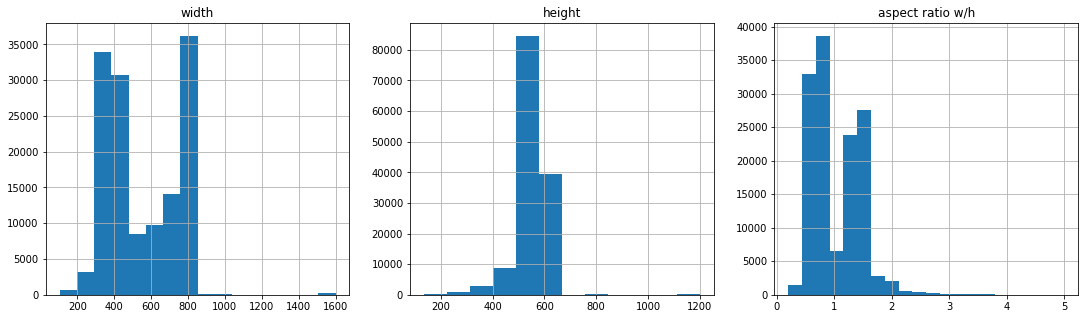

In [40]:
plt.tight_layout()
fig, axes = plt.subplots(nrows=1, ncols=3,  gridspec_kw = {'width_ratios':[1, 1, 1]})
fig.set_size_inches(18.5, 5)

axes[0].set_title('width')
filtered_df.width.hist(bins=16, ax=axes[0])
axes[1].set_title('height')
filtered_df.height.hist(bins=12, ax=axes[1])
axes[2].set_title('aspect ratio w/h')
(filtered_df.width /filtered_df.height).hist(bins=20, ax=axes[2])
plt.show()

filter out the Ceramics as they mess up the classification

In [36]:
filtered_df = filtered_df[filtered_df.theme_label != 0]
filtered_df = filtered_df[filtered_df.domain.str.contains('céramique')==False]
#filtered_df = filtered_df[filtered_df.domain.str.contains('peinture')==True]
#filtered_df = filtered_df[filtered_df.label != 'espèce animale+élément d\'architecture']
#filtered_df = filtered_df[filtered_df.label != 'élément d\'architecture+être humain']

print(filtered_df.shape, 'without céramique')
#print(filtered_df.shape, 'paintings only')
print(filtered_df.groupby(by=group_by).size())

filtered_df.head()

(137429, 11) without céramique
theme_label
autoportrait                       568
figure                           21465
figure biblique                   2723
figure mythologique               1562
figures                            310
figures bibliques                  785
figures mythologiques              245
fond de paysage                      7
groupe de figures                 1750
groupes de figures                   7
nature morte                      1188
ornementation                     4380
paysage                          20311
portrait                         19573
portrait charge                    822
portrait collectif                 728
portrait d'inconnu                2473
représentation animalière         6516
représentation d'objet            3815
représentation humaine             186
représentation non figurative      597
représentation scientifique       1976
représentation végétale           2196
scène                            18937
scène biblique       

,label,repr,imagePath,ref,term_count,top_term_count,terms,domain,theme_label,width,height
0,genre de la représentation,"paysage (canal, village, passerelle, barque, p...",/0093/m503501_d0109897-000_p.jpg,50350109897,1,1,paysage,dessin,paysage,768,512
1,genre de la représentation,"portrait (Henri III, roi de Pologne, roi de Fr...",/0662/m501702_0006031_p.jpg,50170000659,1,1,portrait,estampe ; histoire,portrait,432,600
2,genre de la représentation,"scène historique (Compiègne, camp militaire, t...",/0681/m505201_0005967_p.jpg,50520006604,1,1,scène historique,dessin,scène historique,800,563
3,genre de la représentation,"paysage (Italie, Naples, bord de mer, barque)",/0607/m074801_0013901_p.jpg,07480012258,1,1,paysage,dessin,paysage,800,521
4,genre de la représentation,scène biblique (Présentation de la Vierge au T...,/0532/m501104_94-056183_p.jpg,50110000448,1,1,scène biblique,peinture,scène biblique,486,600


In [39]:
filtered_df.groupby(by=group_by).size().sort_values()

theme_label
fond de paysage                      7
représentation humaine             186
nature morte                      1188
représentation non figurative     1488
représentation scientifique       1976
représentation végétale           2196
représentation d'objet            3815
ornementation                     4380
représentation animalière         6516
vue d'architecture                9429
paysage                          20311
portrait                         24164
figure                           28871
scène                            32902
dtype: int64

## Combine some theme categories 


In [38]:
# all portraits => portrait
filtered_df.loc[filtered_df.theme_label.str.contains('portrait'), 'theme_label'] = 'portrait'

# extend représentation non figurative with vue d'intérieur
filtered_df.loc[filtered_df.theme_label.str.contains("vue d'intérieur"), 'theme_label'] = 'représentation non figurative'

# 
#filtered_df.loc[filtered_df.theme_label.str.contains('biblique'), 'theme_label'] = 'scène biblique'
#filtered_df.loc[filtered_df.theme_label.str.contains('mythologique'), 'theme_label'] = 'scène mythologique'
#filtered_df.loc[filtered_df.theme_label.str.contains('paysage'), 'theme_label'] = 'paysage'
#filtered_df.loc[filtered_df.theme_label.str.contains('figure'), 'theme_label'] = 'figure'

filtered_df.loc[filtered_df.theme_label.str.contains('figure'), 'theme_label'] = 'figure'
filtered_df.loc[filtered_df.theme_label.str.contains('scène'), 'theme_label'] = 'scène'

## Stratified Split

In [40]:
cat_list = filtered_df.groupby(by=group_by).size()

min_strata_size = 1200#cat_list.min()

dataset_split = {'train': 1000/1200,
                 'val':   100/1200,
                 'test':  100/1200}

In [41]:
cat_list[cat_list < 1000]

theme_label
fond de paysage             7
représentation humaine    186
dtype: int64

In [43]:
cat_list[cat_list >= 1000]

theme_label
figure                           28871
nature morte                      1188
ornementation                     4380
paysage                          20311
portrait                         24164
représentation animalière         6516
représentation d'objet            3815
représentation non figurative     1488
représentation scientifique       1976
représentation végétale           2196
scène                            32902
vue d'architecture                9429
dtype: int64

In [44]:
filtered_df['usage'] = 'remain'

for category in cat_list[cat_list >= 1000].keys():
    train_idx, val_idx, test_idx = imagedata.train_validate_test_split(filtered_df[filtered_df[group_by] == category],
                                                             train_percent = dataset_split['train'],
                                                             val_percent = dataset_split['val'],
                                                             test_percent = dataset_split['test'],
                                                             max_size = min_strata_size)

    filtered_df.loc[train_idx , ['usage']] = 'train'
    filtered_df.loc[val_idx , ['usage']] = 'val'
    filtered_df.loc[test_idx , ['usage']] = 'test'

filtered_df = filtered_df[filtered_df.usage != 'remain']

# Two way frequency table
pd.options.display.max_rows = 999
pd.crosstab(index=filtered_df[group_by], 
                  columns=filtered_df['usage'])

usage,test,train,val
theme_label,,,
figure,100,1000,100
nature morte,99,990,99
ornementation,100,1000,100
paysage,100,1000,100
portrait,100,1000,100
représentation animalière,100,1000,100
représentation d'objet,100,1000,100
représentation non figurative,100,1000,100
représentation scientifique,100,1000,100


In [45]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

mlb.fit_transform(filtered_df['label'].str.split('+'))[2]

array([1])

### Save Dataset Description file

In [45]:
class_root

'C:/Datasets/Joconde\\Themes'

In [46]:
image_set_desc_file = os.path.join(class_root, 'dataset4.csv')

if not os.path.exists(class_root):
    os.makedirs(class_root)
    
filtered_df.to_csv(image_set_desc_file)

### Cross Validation Split

In [8]:
group_by='label'
cat_list = filtered_df.groupby(by=group_by).size()

min_strata_size = 1000# cat_list.min()

In [9]:
filtered_df['usage'] = 'remain'

for category in cat_list.keys():
    trainval_idx, test_idx = imagedata.train_cross_validate_test_split(filtered_df[filtered_df[group_by] == category],
                                                             trainval_percent = 0.9,
                                                             test_percent = 0.1,
                                                             n_folds = 10,
                                                             max_size = min_strata_size)
    
    for i , fold_idx in enumerate(trainval_idx):
        filtered_df.at[fold_idx, ['usage']] = 'train' + str(i)
        
    filtered_df.loc[test_idx , ['usage']] = 'test'


# Two way frequency table
pd.crosstab(index=filtered_df[group_by], 
            columns=filtered_df['usage'])

usage,remain,test,train0,train1,train2,train3,train4,train5,train6,train7,train8,train9
label,,,,,,,,,,,,
canidé,0,78,70,70,70,70,70,70,70,70,70,70
oiseau,101,100,90,90,90,90,90,90,90,90,90,90
équidé,212,100,90,90,90,90,90,90,90,90,90,90
être humain,32454,100,90,90,90,90,90,90,90,90,90,90


### Save Dataset Description file

In [12]:
image_set_desc_file = os.path.join(descr_path, 'dataset1_cv.csv')

if not os.path.exists(descr_path):
    os.makedirs(descr_path)
    
filtered_df.to_csv(image_set_desc_file)

# Scrapbook